In [1]:
# basic toolkit for the workflow
import pandas as pd
from qsarify import data_tools as dt
from qsarify import clustering as cl
from qsarify import feature_selection_single as fss
from qsarify import feature_selection_multi as fsm
from qsarify import cross_validation as cv
from qsarify import export_model as em

In [2]:
# in this example, the last column is the response variable (log10 of LD50)
# we use pandas to manipulate the data
dfx = pd.DataFrame(pd.read_csv('28BenzeneDescriptors.csv')).iloc[:,:-1]
dfy = pd.DataFrame(pd.read_csv('28BenzeneDescriptors.csv')).iloc[:,-1]

In [3]:
dfx.head()

,No.,AMW,Sp,Mv,Me,Ms,nBM,ARR,RBN,RBF,...,PCWTe,LDI,Hy,AMR,MLOGP,MLOGP2,ALOGP,GVWAI-80,Infective-80,BLTD48
0,1,6.510,8.284,0.649,0.971,2.000,6,1.000,0,0.000,...,10.100,0.062,-0.921,26.058,2.255,5.085,2.047,0,0,-3.46
1,2,6.143,10.045,0.626,0.969,1.952,6,0.857,1,0.067,...,11.371,0.057,-0.936,31.099,2.608,6.802,2.514,0,0,-3.80
2,3,8.794,9.438,0.658,1.037,3.074,8,0.889,1,0.071,...,2.209,0.144,-0.636,33.383,1.797,3.229,2.000,0,0,-3.03
3,4,8.068,11.199,0.636,1.024,2.933,8,0.800,2,0.118,...,2.441,0.130,-0.672,38.424,2.150,4.623,2.467,0,0,-3.36
4,5,8.068,11.199,0.636,1.024,2.933,8,0.800,2,0.118,...,2.313,0.123,-0.672,38.424,2.150,4.623,2.467,0,0,-3.36


In [4]:
dfx.shape 

(28, 676)

In [5]:
# this is the basic workflow for the data_tools module
dfx = dt.rm_nan(dfx)
dfx = dt.rm_constant(dfx)
dfx = dt.rm_lowVar(dfx)
dfx = dt.rm_nanCorr(dfx)
xtrain, xtest, ytrain, ytest = dt.sorted_split(dfx,dfy,0.2)
xtrain, xtest = dt.scale_data(xtrain, xtest)
print( xtrain.shape, '\n', xtest.shape)

(22, 549) 
 (6, 549)


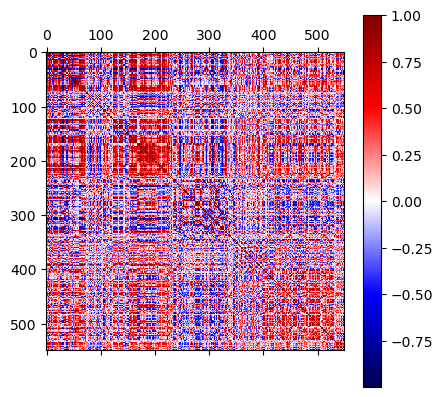

(22, 549) 
 (6, 549)


In [6]:
# there is also an option to do all of the above as one process
# using a cutoff for autocorrelation of X variables
# while also outputting the autocorrelation matrix 
dfx = pd.DataFrame(pd.read_csv('28BenzeneDescriptors.csv')).iloc[:,:-1]
xtrain, xtest, ytrain, ytest = dt.clean_data(dfx, dfy, split='sorted', cutoff=0.9, plot=True)
print( xtrain.shape, '\n', xtest.shape)

In [7]:
# creates a feature cluster with 'average' euclidean distance and cutoff of 2
# this is the tunable part of the system 
clust = cl.featureCluster(xtrain, method='info',link='average', cut_d=2)

In [8]:
# export the results of the clustering, returning the dictionary we will use later
# optionally, print out everything
# optionally, also graph a dendogram (mostly for tuning rather than visualization)
clusterinfo = clust.set_cluster(verbose=True, graph=False)


 Cluster 1 ['HATS3e', 'R3e']

 Cluster 2 ['HATS3u']

 Cluster 3 ['MATS2m']

 Cluster 4 ['R2p+']

 Cluster 5 ['HATS0e', 'R2v+', 'R4e+']

 Cluster 6 ['HATS2e', 'R2e+']

 Cluster 7 ['H2u']

 Cluster 8 ['RTe+']

 Cluster 9 ['BELv4', 'BELe1', 'J3D']

 Cluster 10 ['BELm6', 'HATS2v', 'HATS4e']

 Cluster 11 ['SPAM', 'Mor11u']

 Cluster 12 ['Mor11e']

 Cluster 13 ['BELv1']

 Cluster 14 ['HATS1p', 'HATS2p']

 Cluster 15 ['HATS1v']

 Cluster 16 ['MATS3v']

 Cluster 17 ['BEHv2']

 Cluster 18 ['BEHv4']

 Cluster 19 ['BELe2', 'BELe4']

 Cluster 20 ['nC']

 Cluster 21 ['MATS7v', 'MATS7p']

 Cluster 22 ['Mor22v']

 Cluster 23 ['E3s']

 Cluster 24 ['HATS2m']

 Cluster 25 ['RTm+']

 Cluster 26 ['R2m+']

 Cluster 27 ['CIC0']

 Cluster 28 ['BELm4', 'Mor17v']

 Cluster 29 ['BELm2']

 Cluster 30 ['Mor17u']

 Cluster 31 ['Mor17m']

 Cluster 32 ['R4u']

 Cluster 33 ['R1m+']

 Cluster 34 ['C-001']

 Cluster 35 ['HATS0p', 'RTp+']

 Cluster 36 ['R1p+']

 Cluster 37 ['R1v']

 Cluster 38 ['R1p']

 Cluster 39 ['X2

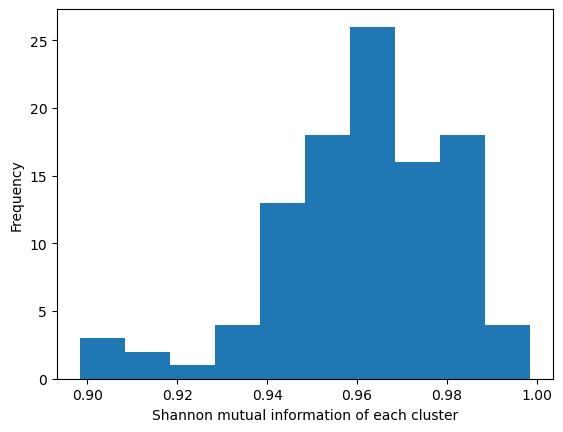

In [9]:
# this is the important diagnostic for the method:
# "good" cutoff gives a histogram with smooth curvature 
clust.cluster_dist()

In [10]:
# let's try single-threaded feature selection 
# giving training set, clusterinfo, and number of components to select for 
# model is either regression or classification
# learning is number of total epochs to train
# bank is number a memory of best models filtered 
# interval is how often you want updates on progress
# the system returns a list of features it found were best

# this is a small data set, so smaller bank and intervals are used to show convergence
features = fss.mlr_selection(xtrain, ytrain, clusterinfo, 2, model="regression", learning=200, bank=50, interval=10)

Start time:  04:21:03
 Regression 
10 => 04:21:03 [0.7204291458072626, ['H1u', 'X5Av']]
20 => 04:21:04 [0.7932755997633876, ['RDF070v', 'X5Av']]
30 => 04:21:04 [0.7932755997633876, ['RDF070v', 'X5Av']]
40 => 04:21:04 [0.7932755997633876, ['RDF070v', 'X5Av']]
50 => 04:21:05 [0.7932755997633876, ['RDF070v', 'X5Av']]
60 => 04:21:05 [0.7932755997633876, ['RDF070v', 'X5Av']]
70 => 04:21:05 [0.7932755997633876, ['RDF070v', 'X5Av']]
80 => 04:21:06 [0.7932755997633876, ['RDF070v', 'X5Av']]
90 => 04:21:06 [0.7932755997633876, ['RDF070v', 'X5Av']]
100 => 04:21:07 [0.7932755997633876, ['RDF070v', 'X5Av']]
110 => 04:21:07 [0.7932755997633876, ['RDF070v', 'X5Av']]
120 => 04:21:07 [0.7932755997633876, ['RDF070v', 'X5Av']]
130 => 04:21:08 [0.7932755997633876, ['RDF070v', 'X5Av']]
140 => 04:21:08 [0.7932755997633876, ['RDF070v', 'X5Av']]
150 => 04:21:08 [0.7932755997633876, ['RDF070v', 'X5Av']]
160 => 04:21:09 [0.7932755997633876, ['RDF070v', 'X5Av']]
170 => 04:21:09 [0.7932755997633876, ['RDF070v', '

In [11]:
# we can export this model for now 
model1 = em.ModelExport(xtrain, ytrain, xtest, ytest, features)
# show summary data 
model1.mlr()

Model features:  ['RDF070v', 'X5Av']
Coefficients:  [-1.10169978 -2.12082577]
Intercept:  -1.6192627152834516
RMSE: 0.250852
R^2: 0.793276


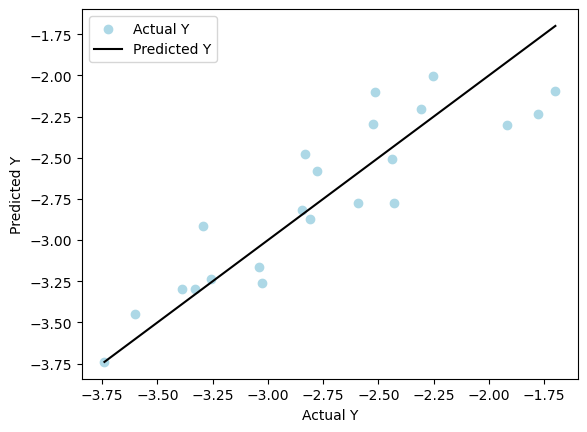

In [12]:
# show plot of training
model1.train_plot()

22


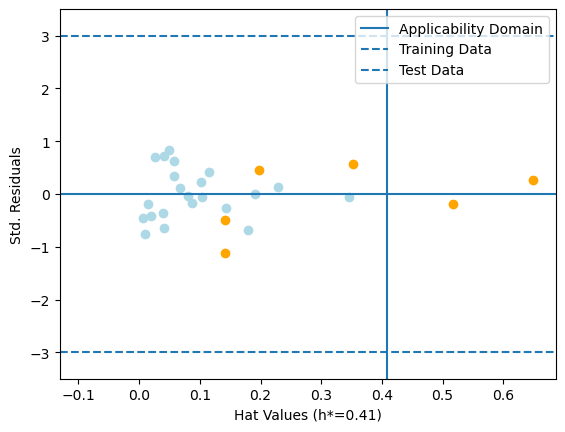

In [13]:
# plot the Williams Plot of the model, a diagnostic of points which are outliers or have high leverage on the model
model1.williams_plot()

R2 0.7932755997633876
Q2 0.7099699197171896
RMSE 0.2508516645820538
coef [-1.10169978 -2.12082577]
intercept -1.6192627152834516


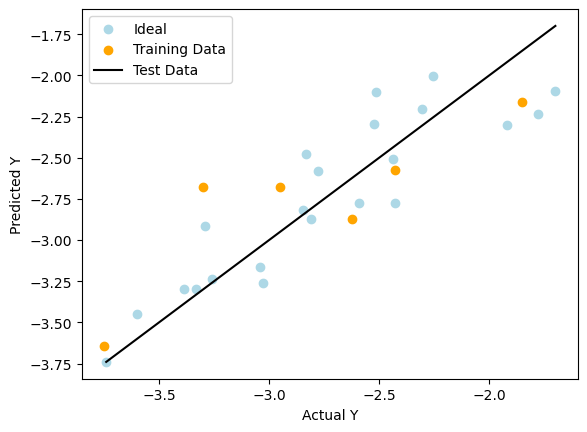

In [14]:
# plot the model with external test set 
model1.external_set()

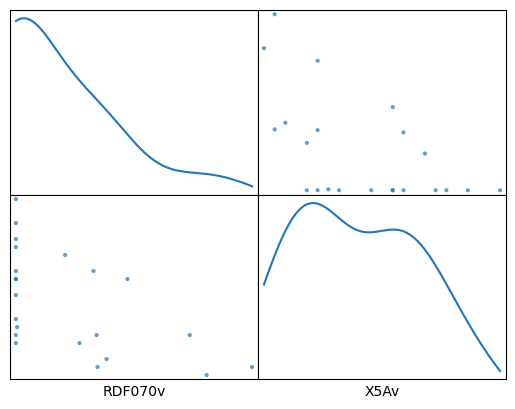

In [15]:
# plot the correlation of each feature with the response value 
model1.model_corr()

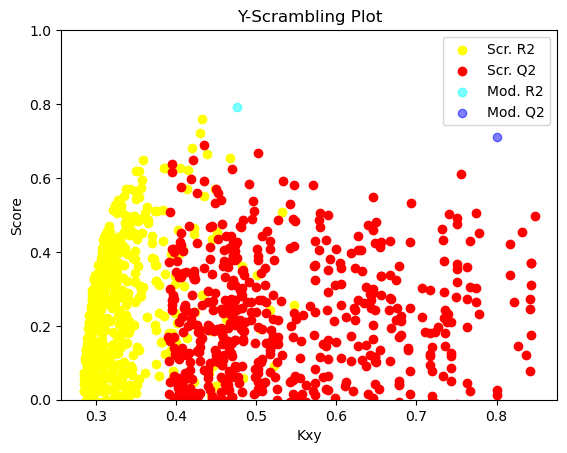

In [16]:
# for some n number of points: default to 1000
model1.y_scrambling(n=1000)

In [23]:
# show diagnostic scores for the model 
print(model1.scores(verbose=True))

RMSE : 0.2508516645820538
RMSE External : 0.32911620696721
R2 : 0.7932755997633876
Q2 : 0.7099699197171896
Q2F1 : 0.7138880300214396
Q2F2 : 0.7099699197171896
Q2F3 : 0.9978028024221
CCC : 0.9007449089766995
{'RMSE': 0.2508516645820538, 'RMSE External': 0.32911620696721, 'R2': 0.7932755997633876, 'Q2': 0.7099699197171896, 'Q2F1': 0.7138880300214396, 'Q2F2': 0.7099699197171896, 'Q2F3': 0.9978028024221, 'CCC': 0.9007449089766995}


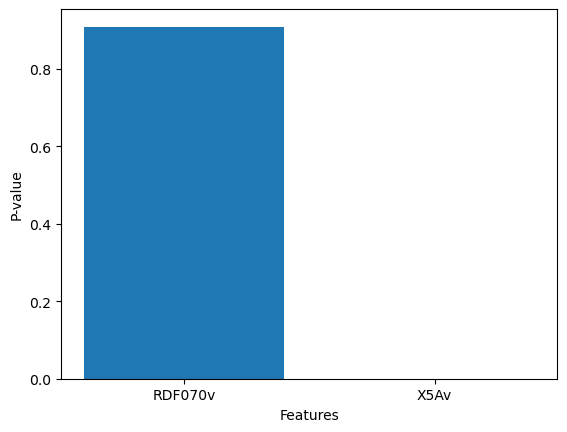

In [19]:
# plot the p-values of the chosen features 
model1.p_value_plot()

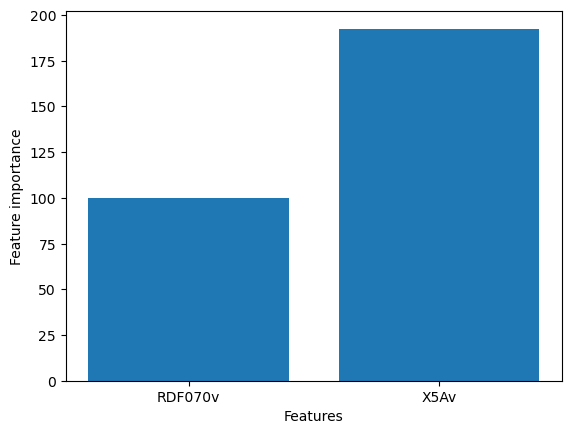

In [20]:
# show the relative feature importance 
model1.feature_importance_plot()

In [21]:
# perform cross validation of the model to check model stability
cross_validation = cv.cross_validation(dfx, dfy, ['RDF070v', 'X5Av'])

R^2CV mean: 0.783114
Q^2CV mean: 0.645587
RMSE CV : 0.269355
Features set = ['RDF070v', 'X5Av']
Model coeff =  [-1.03554145 -1.99268703]
Model intercept =  -1.7699253003146924
Q^2F1CV mean: 0.720871
Q^2F2CV mean: 0.645587
Q^2F3CV mean: 0.997226
CCC CV : 0.902914


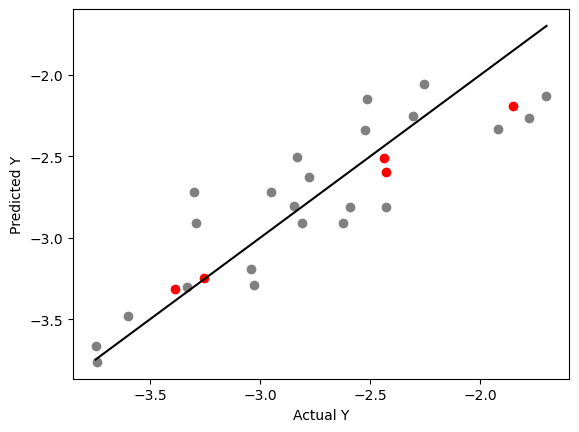

In [22]:
# perform 5-fold cross validation of the model
cross_validation.kfoldcv(k=5, verbose=True, show_plots=True)